<a href="https://colab.research.google.com/github/tarangga/Machine-Learning/blob/main/Naive_Bayes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
list_df = []
for p in listdir('/content/drive/MyDrive/Colab Data/Clickbait Headlines - CLICK-ID/annotated/csv'):
  source = re.search('_(.+).csv', p).group(1)
  df = pd.read_csv('/content/drive/MyDrive/Colab Data/Clickbait Headlines - CLICK-ID/annotated/csv/' + p)
  df['source'] = source
  list_df.append(df)

all_df = pd.concat(list_df)
print(all_df.iloc[0])
del all_df['label']
all_df.dropna(inplace=True)
all_df.shape

title          Prediksi Susunan Pemain Timnas Inggris vs Koso...
label                                              non-clickbait
label_score                                                    0
source                                                tribunnews
Name: 0, dtype: object


(14999, 3)

In [ ]:
all_df.groupby(['label_score']).count()

,title,source
label_score,,
0,8709,8709
1,6290,6290


In [ ]:
data = all_df.groupby(['label_score', 'source']).count()
data

title
label_score source           
0           detikNews     890
            fimela        306
            kapanlagi     603
            kompas       1157
            liputan6      613
            okezone       741
            pos_metro      71
            republika    1267
            sindonews    1214
            tempo        1118
            tribunnews    451
            wowkeren      278
1           detikNews     110
            fimela        394
            kapanlagi     397
            kompas        343
            liputan6      887
            okezone       759
            pos_metro     229
            republika     233
            sindonews     285
            tempo         382
            tribunnews   1049
            wowkeren     1222

In [ ]:
l_dict

{(0, 'detikNews'): 890,
 (0, 'fimela'): 306,
 (0, 'kapanlagi'): 603,
 (0, 'kompas'): 1157,
 (0, 'liputan6'): 613,
 (0, 'okezone'): 741,
 (0, 'pos_metro'): 71,
 (0, 'republika'): 1267,
 (0, 'sindonews'): 1214,
 (0, 'tempo'): 1118,
 (0, 'tribunnews'): 451,
 (0, 'wowkeren'): 278,
 (1, 'detikNews'): 110,
 (1, 'fimela'): 394,
 (1, 'kapanlagi'): 397,
 (1, 'kompas'): 343,
 (1, 'liputan6'): 887,
 (1, 'okezone'): 759,
 (1, 'pos_metro'): 229,
 (1, 'republika'): 233,
 (1, 'sindonews'): 285,
 (1, 'tempo'): 382,
 (1, 'tribunnews'): 1049,
 (1, 'wowkeren'): 1222}

In [ ]:
l_dict = dict(data['title'])
data_0 = []
data_1 = []
src = list(all_df['source'].unique())
for c in src:
  data_0.append(l_dict[(0, c)])
  data_1.append(l_dict[(1, c)])

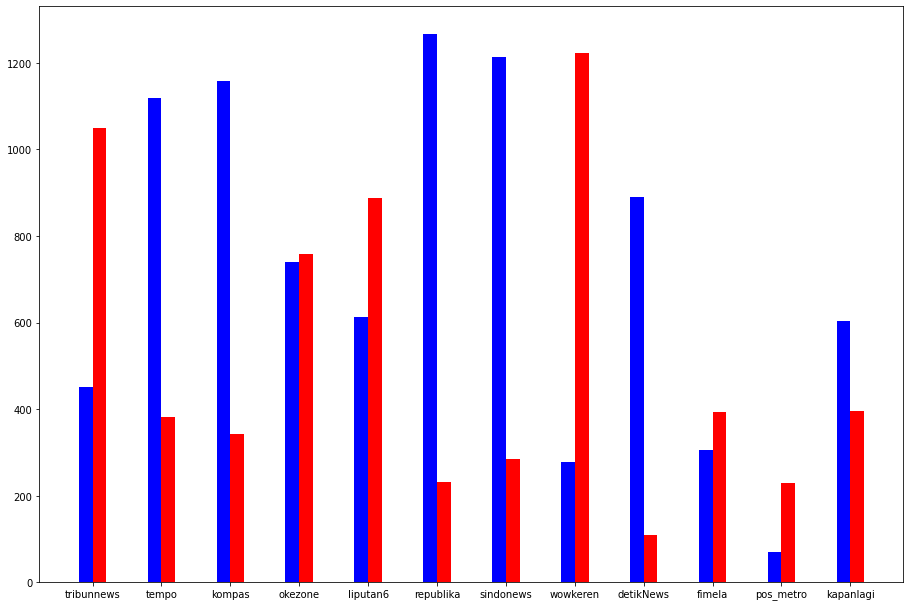

In [ ]:
X = np.arange(len(src))
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(X - 0.1, data_0, color = 'b', width = 0.2)
ax.bar(X + 0.1, data_1, color = 'r', width = 0.2)
plt.xticks(X, src)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
import spacy
from spacy.lang.id.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
vect = TfidfVectorizer(stop_words=STOP_WORDS)
x = vect.fit_transform(all_df['title'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, all_df['label_score'], test_size = 0.3)

In [ ]:
model = MultinomialNB()
k_fold = KFold(8)
acc = []
y = all_df['label_score']
for train, test in k_fold.split(x):
  model.fit(x[train], y.iloc[train])
  acc.append(model.score(x[test], y.iloc[test]))
print(acc.index(max(acc)), max(acc))

6 0.8229333333333333


In [ ]:
train, test = list(k_fold.split(x))[acc.index(max(acc))]
model.fit(x[train], y.iloc[train])
print(model.score(x[test], y.iloc[test]))
pred_MNB = model.predict(x[test])
sum(pred_MNB == y.iloc[test])/len(pred_MNB)

0.8229333333333333


0.8229333333333333

In [ ]:
prob_df = all_df.iloc[train]
prob_df.head(2)

,title,label_score,source
0,Prediksi Susunan Pemain Timnas Inggris vs Koso...,0,tribunnews
1,"Ambil Formulir Pilkada Tangsel dari PDI-P, Sit...",0,tribunnews


In [ ]:
len(pred_pMNB)

1875

In [ ]:
pred_pMNB = model.predict_proba(x[train])
prob_df['prob_false'] = [p[0] for p in pred_pMNB]
prob_df['prob_true'] = [p[1] for p in pred_pMNB]
prob_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,title,label_score,source,prob_false,prob_true
0,Prediksi Susunan Pemain Timnas Inggris vs Koso...,0,tribunnews,0.897919,0.102081
1,"Ambil Formulir Pilkada Tangsel dari PDI-P, Sit...",0,tribunnews,0.745835,0.254165
2,Mulan Jameela Mantan Duet Maia Estianty Rela M...,1,tribunnews,0.128843,0.871157
3,Dukung Operasional Bandara Internasional Kerta...,0,tribunnews,0.923483,0.076517
4,"KPK Cekal Melchias Markus Mekeng, Golkar Minta...",0,tribunnews,0.848445,0.151555
...,...,...,...,...,...
995,Barack Obama Kirim Ucapan Selamat atas Pertuna...,0,kapanlagi,0.418908,0.581092
996,"Ingin Fokus ke Musik, Syifa Hadju Siap Kolabor...",0,kapanlagi,0.705218,0.294782
997,"Heboh Kasus Jung Joon Young, YouTuber Ini Ngak...",1,kapanlagi,0.065327,0.934673
998,"Rusak Barang Bukti, Jung Joon Young Reset Hape...",0,kapanlagi,0.567847,0.432153


In [ ]:
prob_df['source'].unique()

array(['tribunnews', 'tempo', 'kompas', 'okezone', 'liputan6',
       'republika', 'sindonews', 'wowkeren', 'fimela', 'pos_metro',
       'kapanlagi'], dtype=object)

In [ ]:
preb_dict = dict(prob_df.groupby(by=['label_score', 'source']).count()['title'])
publ_false = {}
src = ['tribunnews',
 'tempo',
 'kompas',
 'okezone',
 'liputan6',
 'republika',
 'sindonews',
 'wowkeren',
 'fimela',
 'pos_metro',
 'kapanlagi']
 
for col in src:
  publ_false[col] = preb_dict[(1, col)]/(preb_dict[(0, col)] + preb_dict[(1, col)])

prob_df['false_publisher'] = prob_df['source'].apply(lambda x:publ_false[x])
prob_df['true_publisher'] = 1 - prob_df['false_publisher']
prob_df['new_false'] = prob_df['prob_false']*prob_df['false_publisher']
prob_df['new_true'] = prob_df['prob_true']*prob_df['true_publisher']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
sum(prob_df['label_score'] == (prob_df['new_false'] <= prob_df['new_true']))/len(prob_df['label_score'])

0.6331911002743066

***PREDICT ALL DATAFRAME***

In [ ]:
list_df = []
for p in listdir('/content/drive/MyDrive/Colab Data/Clickbait Headlines - CLICK-ID/raw/csv'):
  source = re.search('(.+).csv', p).group(1)
  df = pd.read_csv('/content/drive/MyDrive/Colab Data/Clickbait Headlines - CLICK-ID/raw/csv/' + p)
  df['source'] = source
  list_df.append(df)

prdct_df = pd.concat(list_df)
res = model.predict_proba(vect.transform(prdct_df['title']))
pred = model.predict(vect.transform())

In [ ]:
[1] + [0]

[1, 0]

In [ ]:
pos = len(res[res == 1]) + all_df[all_df['label_score'] == 1].shape[0]
neg = len(res[res == 0] + all_df[all_df['label_score'] == 0].shape[0])
all = pos + neg
print('Clickbait\t', pos, '\t', pos/all)
print('Non-Clickbait\t', neg, '\t', neg/all)

Clickbait	 16181 	 0.36001779953276225
Non-Clickbait	 28764 	 0.6399822004672377
